In [103]:
import cv2
import urllib
import numpy as np


import matplotlib.pyplot as plt
from cv2.gapi import kernel

In [219]:
# Switch between the following two samples if you want to see different examples
req = urllib.request.urlopen('https://i.pinimg.com/originals/f2/8b/5a/f28b5a95ac63b6a42bf794528a8902a5.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

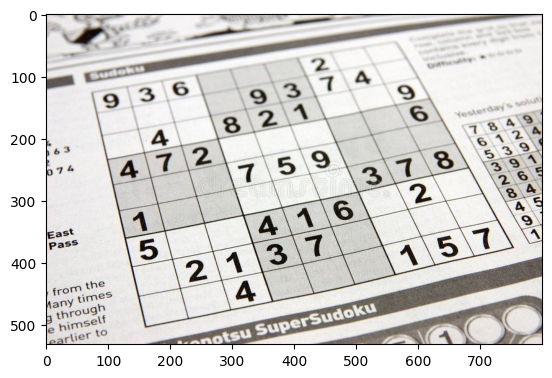

In [220]:
plt.imshow(img_rgb);

Convert to grayscale
We don’t need any color information.

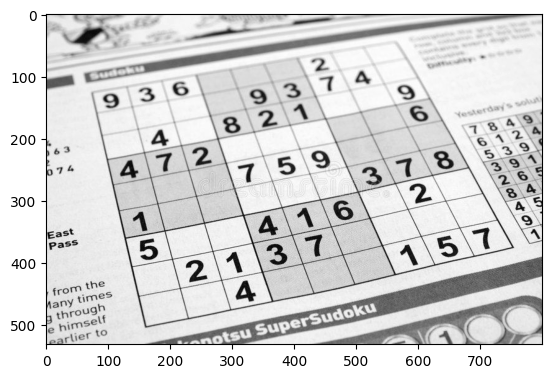

In [221]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray");

In [222]:
img_gray_equalized = cv2.equalizeHist(img_gray)
img_gray_blurred = cv2.GaussianBlur(img_gray_equalized, (3, 3), 0)

Thresholding step
We don’t need the full scale of grayscale either, just binary. But, is ordinary thresholding enough? Or is “adaptive thresholding” better?
Do your research!
Adaptive Thresholding is better because it will adapt to the change of light intensity along the image as we see here global thresholding will alaways result in losing some of the image due to the change of light intensity along the image

Text(0.5, 1.0, 'Global Thresholding')

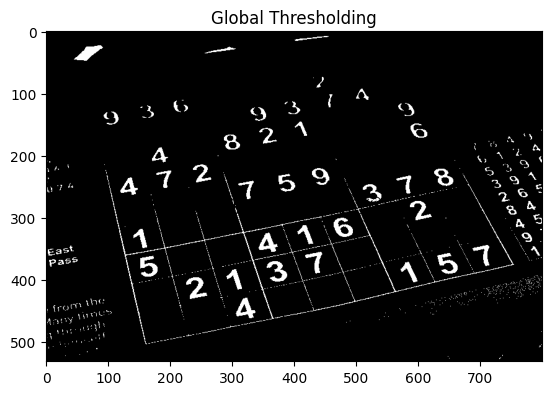

In [223]:
_, img_gray_global_threshed = cv2.threshold(img_gray, 70, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_gray_global_threshed, cmap='gray')
plt.title('Global Thresholding')


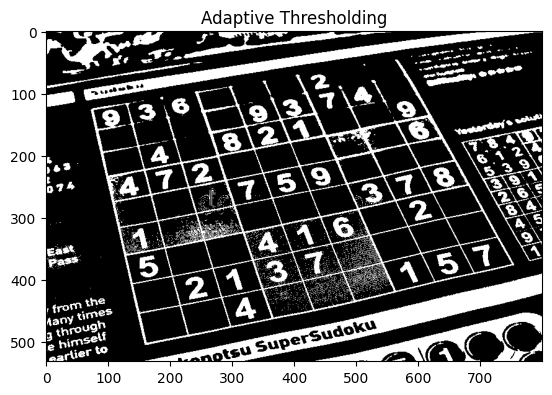

In [224]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=111,
    C=5

)
plt.title('Adaptive Thresholding')
plt.imshow(img_gray_threshed, cmap="gray");

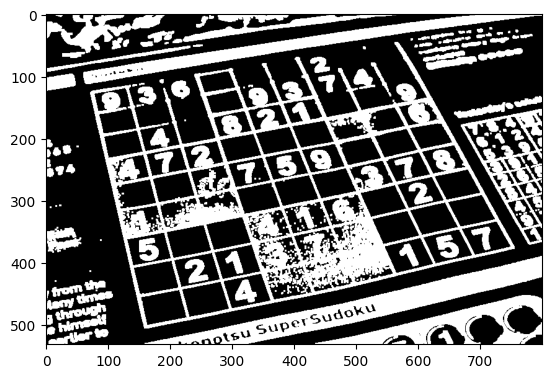

In [225]:
####################ADDED just trying some morphological methods################
kernel1 =np.ones((3,3),np.uint8)
dilation=cv2.dilate(img_gray_threshed,kernel1,iterations=1)
erosion=cv2.erode(dilation,kernel1,iterations=1)
closing =cv2.morphologyEx(img_gray_threshed,cv2.MORPH_CLOSE,kernel1,iterations=1)
opeining =cv2.morphologyEx(dilation,cv2.MORPH_OPEN,kernel1,iterations=1)
erosion=cv2.erode(opeining,kernel1,iterations=2)
plt.imshow(dilation,cmap="gray")


In [226]:
####################ADDED################
def biggestContour (contours):
    biggest=np.array([])
    max_area=0
    for i in contours:
        area=cv2.contourArea(i)
        if area> 50:
            peri=cv2.arcLength(i,True)
            approx=cv2.approxPolyDP(i,0.02*peri,True)
            if area > max_area and len(approx)==4:
                biggest=approx
                max_area=area
    return biggest,max_area
def reorder(myPoints):
    myPoints=myPoints.reshape((4,2))
    myPointsNew=np.zeros((4,1,2),dtype=np.int32)
    add=myPoints.sum(1)
    myPointsNew[0]=myPoints[np.argmin(add)]
    myPointsNew[3]=myPoints[np.argmax(add)]
    diff=np.diff(myPoints,axis=1)
    myPointsNew[1]=myPoints[np.argmin(diff)]
    myPointsNew[2]=myPoints[np.argmax(diff)]
    return myPointsNew


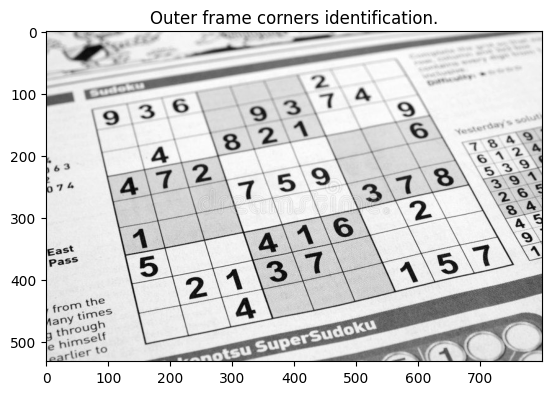

In [227]:
####################ADDED################
heightImg=450
widthImg=450
imgContours=img_gray.copy()
imgBigContour=img_gray.copy()
contours, hierarchy, =cv2.findContours(img_gray_threshed,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgContours,contours,-1,(255,50,0),10)
biggest,maxArea=biggestContour(contours)
if biggest.size !=0:
    biggest=reorder(biggest)
    cv2.drawContours(imgBigContour,biggest,-1,(255,0,0),20)
    pts1=np.float32(biggest)
    pts2=np.float32([[0,0],[widthImg,0],[0,heightImg],[widthImg,heightImg]])
    matrix=cv2.getPerspectiveTransform(pts1,pts2)
    imgWrapedgrey=cv2.warpPerspective(img_gray,matrix,(widthImg,heightImg))
    # imgDetectedDigits=imgBlank.copy()
    # imgWrapedColored=cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
plt.title('Outer frame corners identification.')
plt.imshow(imgBigContour,cmap="gray")

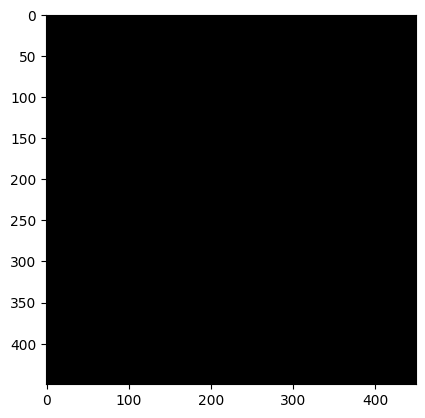

In [232]:
####################ADDED################
plt.imshow(imgWrapedgrey,cmap="gray")


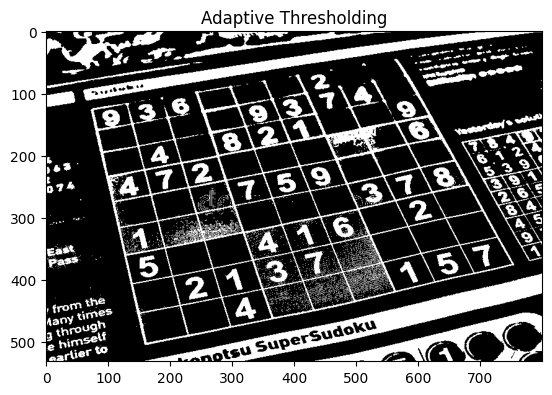

In [230]:
####################ADDED################

img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=99,
    C=3
)
plt.title('Adaptive Thresholding')
plt.imshow(img_gray_threshed, cmap="gray");

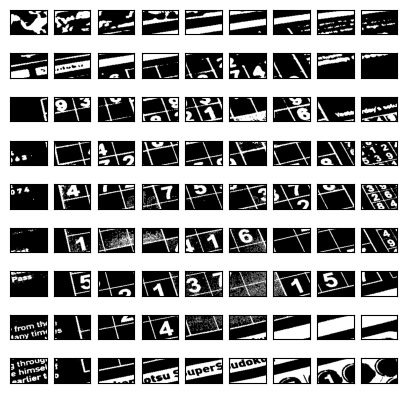

In [231]:
#CHANGED img_gray_threshed_warped to img_gray_threshed

M = img_gray_threshed.shape[0] // 9
N = img_gray_threshed.shape[1] // 9
number_tiles = []
for i in range(9):
    number_tiles.append([])
    for j in range(9):
        tile = img_gray_threshed[i*M:(i+1)*M, j*N:(j+1)*N]
        number_tiles[i].append(tile)

_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(number_tiles[i][j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
